In [1]:
import pandas as pd
import numpy as np
import time 

import shap
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import shap

In [2]:
train = pd.read_parquet('train.parquet')
test = pd.read_parquet('test.parquet')

In [3]:
#Eliminamos las siguientes columnas, ya que de momento no las vamos a usar
train = train.drop(columns = ['device','interaction_type','command'])
#Eliminamos las siguientes columnas, ya que de momento no las vamos a usar
test = test.drop(columns = ['device','interaction_type','command'])

In [4]:
x_train, y_train = train.drop(columns=['global_category']), train['global_category']
x_test, y_test = test.drop(columns=['global_category']), test['global_category']

# Normalización de los datos:

In [5]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(x_test.select_dtypes(include=['float64', 'int64']))

In [19]:
X_train_scaled

array([[6.66666667e-01, 1.00000000e+00, 2.98648649e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.66666667e-01, 1.35135135e-02, ...,
        1.44520548e-01, 1.60282238e-03, 1.06394914e-03],
       [0.00000000e+00, 0.00000000e+00, 4.32432432e-02, ...,
        1.44520548e-01, 1.27238892e-02, 9.51003211e-03],
       ...,
       [3.33333333e-01, 1.00000000e+00, 1.35135135e-02, ...,
        1.06164384e-02, 9.50522564e-04, 2.23195870e-01],
       [3.33333333e-01, 1.00000000e+00, 3.44594595e-02, ...,
        2.12328767e-02, 3.44758875e-05, 2.23218751e-01],
       [1.00000000e+00, 3.33333333e-01, 1.35135135e-02, ...,
        2.12328767e-02, 3.31636359e-03, 2.25420144e-01]])

# Sin hiperparametros:

In [8]:
clf = MLPClassifier()

start = time.time()
clf.fit(X_train_scaled, y_train)
stop = time.time()

In [9]:
print(f"MLP training time: {stop - start}s")
print(f'Train accuracy : {clf.score(X_train_scaled, y_train): .3f}')
print(f'Test accuracy : {clf.score(X_test_scaled, y_test): .3f}')

MLP training time: 18.434710025787354s
Train accuracy :  0.999
Test accuracy :  0.761


# RandomSearchCV (NO MUY EFECTIVO):

In [77]:
param_grid = {'hidden_layer_sizes': [5, 10, 15, (5,5), (5,10), (50,25), (75,50), (100,50),(150,100)], 
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['sgd', 'adam'],
              'learning_rate': ['constant', 'invscaling', 'adaptive'],
              'max_iter': [int(x) for x in np.linspace(start=200, stop=1000, num=800)]}

MLP_RandomGrid = RandomizedSearchCV(estimator = clf,
                                    param_distributions = param_grid, 
                                    cv = 5, verbose=2)

start = time.time()
MLP_RandomGrid.fit(X_train_scaled, y_train)
stop = time.time()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END activation=logistic, hidden_layer_sizes=15, learning_rate=adaptive, max_iter=404, solver=adam; total time=   9.1s
[CV] END activation=logistic, hidden_layer_sizes=15, learning_rate=adaptive, max_iter=404, solver=adam; total time=   9.5s
[CV] END activation=logistic, hidden_layer_sizes=15, learning_rate=adaptive, max_iter=404, solver=adam; total time=  11.0s
[CV] END activation=logistic, hidden_layer_sizes=15, learning_rate=adaptive, max_iter=404, solver=adam; total time=  10.6s
[CV] END activation=logistic, hidden_layer_sizes=15, learning_rate=adaptive, max_iter=404, solver=adam; total time=   6.8s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5), learning_rate=adaptive, max_iter=811, solver=sgd; total time=  12.9s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5), learning_rate=adaptive, max_iter=811, solver=sgd; total time=  19.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5), learning_rate=adaptive, max

Stochastic Optimizer: Maximum iterations (395) reached and the optimization hasn't converged yet.


[CV] END activation=logistic, hidden_layer_sizes=(150, 100), learning_rate=adaptive, max_iter=395, solver=sgd; total time= 1.1min


Stochastic Optimizer: Maximum iterations (395) reached and the optimization hasn't converged yet.


[CV] END activation=logistic, hidden_layer_sizes=(150, 100), learning_rate=adaptive, max_iter=395, solver=sgd; total time= 1.1min


Stochastic Optimizer: Maximum iterations (395) reached and the optimization hasn't converged yet.


[CV] END activation=logistic, hidden_layer_sizes=(150, 100), learning_rate=adaptive, max_iter=395, solver=sgd; total time= 1.1min


Stochastic Optimizer: Maximum iterations (395) reached and the optimization hasn't converged yet.


[CV] END activation=logistic, hidden_layer_sizes=(150, 100), learning_rate=adaptive, max_iter=395, solver=sgd; total time= 1.2min
[CV] END activation=logistic, hidden_layer_sizes=(75, 50), learning_rate=invscaling, max_iter=556, solver=sgd; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(75, 50), learning_rate=invscaling, max_iter=556, solver=sgd; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(75, 50), learning_rate=invscaling, max_iter=556, solver=sgd; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(75, 50), learning_rate=invscaling, max_iter=556, solver=sgd; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(75, 50), learning_rate=invscaling, max_iter=556, solver=sgd; total time=   1.2s
[CV] END activation=identity, hidden_layer_sizes=10, learning_rate=constant, max_iter=863, solver=adam; total time=   4.5s
[CV] END activation=identity, hidden_layer_sizes=10, learning_rate=constant, max_iter=863, solver

In [78]:
print('Score: ', MLP_RandomGrid.best_score_)
print('Parameters: ', MLP_RandomGrid.best_params_)

Score:  0.9617486338797813
Parameters:  {'solver': 'adam', 'max_iter': 231, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (75, 50), 'activation': 'logistic'}


#  Ajuste Manual:

In [6]:
clf = MLPClassifier(hidden_layer_sizes=(100,),
                    max_iter=200,
                    activation='identity', 
                    solver='adam',
                    learning_rate='constant',
                    learning_rate_init=0.0001)

#alpha -> Para la regulación del sobreajuste
#solver = sgd tarda más 
#600 iter

start = time.time()
clf.fit(X_train_scaled, y_train)
stop = time.time()

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [7]:
print(f"MLP training time: {stop - start}s")
print(f'Train accuracy : {clf.score(X_train_scaled, y_train): .3f}')
print(f'Test accuracy : {clf.score(X_test_scaled, y_test): .3f}')

MLP training time: 17.047088384628296s
Train accuracy :  0.974
Test accuracy :  0.850


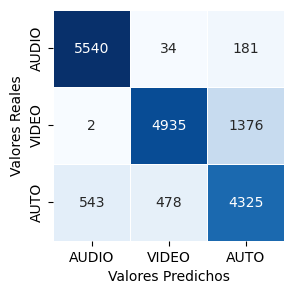

In [8]:
y_pred = clf.predict(X_test_scaled)

cm = metrics.confusion_matrix(y_test, y_pred)

class_names = ['AUDIO', 'VIDEO', 'AUTO']

sns.heatmap(cm, annot = True, fmt = '0.0f', linewidth=0.5, xticklabels=class_names, 
            yticklabels=class_names, square = True, cmap='Blues', cbar = False)

fig = plt.gcf()
fig.set_size_inches(3, 3)

plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

In [26]:
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

          AUDIO       0.91      0.96      0.94      5755
         CAMERA       0.90      0.75      0.82      6313
HOME AUTOMATION       0.71      0.81      0.76      5346

       accuracy                           0.84     17414
      macro avg       0.84      0.84      0.84     17414
   weighted avg       0.85      0.84      0.84     17414

